<a href="https://colab.research.google.com/github/bemakerorg/AIoT_Book_RF/blob/main/AIoT_RF_Book_ES_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importiamo la Libreria Open Source di TensorFlow
import tensorflow as tf
# Facciamo stampare la versione della Libreria
print(tf.__version__)
# Importiamo la Libreria matematica di Python
import numpy as np
# Importiamo la Libreria per il plottaggio molto utile per la visualizzazione
import matplotlib.pyplot as plt

2.15.0


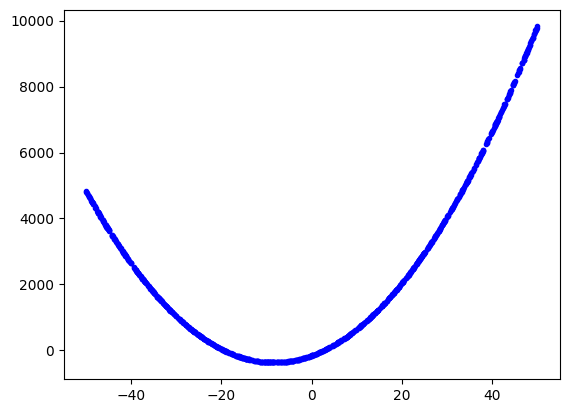

In [ ]:
# Fissiamo il numero di dati che costituiranno il mio Dataset
Num_Punti = 1000

# Poichè generemo dei numeri casuali, è suggeribile fissare il seme cioè SEED
# in questo modo ogni volta che lanciamo il Colab si hanno numeri casuali con lo stesso seme
Seed = 1337

# Inizializziamo il generatore di numeri casuali in TensorFlow fissandone il seme
np.random.seed(Seed)
tf.random.set_seed(Seed)

# Facciamo costruire un array di nome x_value composto da Num_Punti casuali tra un valore minimo
# di -50 ed un valore massimo di +50
x_values = np.random.uniform(low=-50, high=50, size=Num_Punti)

# Facciamo mescolare casualmente con la funzione shuffle i valori di x
np.random.shuffle(x_values)

# Calcoliamo il corrispondente valore y partendo dalla funzione nota
# y = 3 x^2 – 50 x – 160
y_values = 3 * x_values * x_values + 50 * x_values - 160

# Facciamo plottare il risultato, ovvero l'array delle x e quello delle y
plt.plot(x_values, y_values, 'b.')
plt.show()

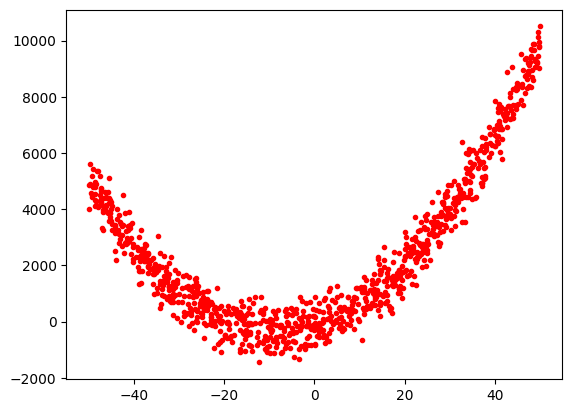

In [ ]:
# Per simulare una raccolta vera di dati è opportuno aggiungere del rumore
y_values += 500 * np.random.randn(*y_values.shape)

# Facciamo plottare ora i valori di y con il rumore aggiunto di colore rosso
plt.plot(x_values, y_values, 'r.')
plt.show()


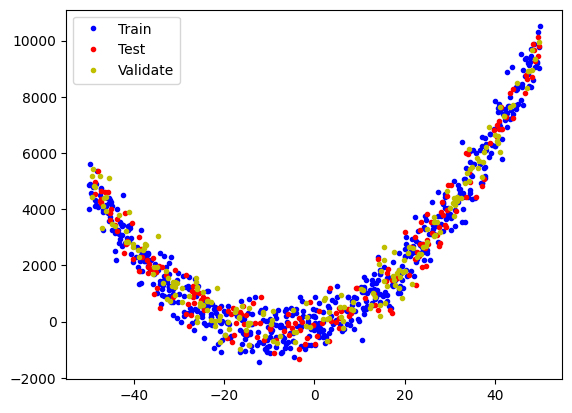

In [ ]:
# Usiamo il 60% dei dati per l'addestramento ed il 20% dei dati per il Test
# il restante 20% dei dati li usiamo per la validazione
TRAIN_SPLIT =  int(0.6 * Num_Punti)
TEST_SPLIT = int(0.2 * Num_Punti + TRAIN_SPLIT)

# Usa np.split per dividere i nostri dati in tre parti.
# Il secondo argomento di np.split è un array di indici in cui si troveranno i dati
# divisi. Forniamo due indici, quindi i dati verranno divisi in tre blocchi.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Ricontrolliamo che le nostre suddivisioni si sommano correttamente
assert (x_train.size + x_test.size + x_validate.size) ==  Num_Punti

# Plotta gli insiemi di dati in colori differenti
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

In [ ]:
# Importa dalla libreria Tensorflow il keras
from tensorflow import keras

# Definire il modello di rete neurale multistrato - piramide decrescente
model_1 = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=[1]),  # Primo hidden layer
    keras.layers.Dense(units=16, activation='relu'),  # Secondo hidden layer
    keras.layers.Dense(units=1)  # Output layer
])

# Compila il modello con ottimizzatore 'adam' e funzione di perdita 'mean squared error'
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Stampa un riepilogo dell'architettura del modello
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Addestra il modello sui nostri dati di addestramento
# e contestualmente convalida il modello utilizzando il set di convalida
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                    validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 13032069.0000 - mae: 2542.6895 - val_loss: 12173368.0000 - val_mae: 2528.1704
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 12957339.0000 - mae: 2534.5000 - val_loss: 12092901.0000 - val_mae: 2518.3064
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 12856705.0000 - mae: 2523.6746 - val_loss: 11977117.0000 - val_mae: 2504.2893
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 12713725.0000 - mae: 2507.7539 - val_loss: 11800762.0000 - val_mae: 2483.0017
Epoch 5/1000
38/38 [==============================] - 0s 4ms/step - loss: 12491300.0000 - mae: 2483.6921 - val_loss: 11538610.0000 - val_mae: 2451.6157
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 12159287.0000 - mae: 2447.6575 - val_loss: 11160342.0000 - val_mae: 2405.9646
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 11702023.0000 

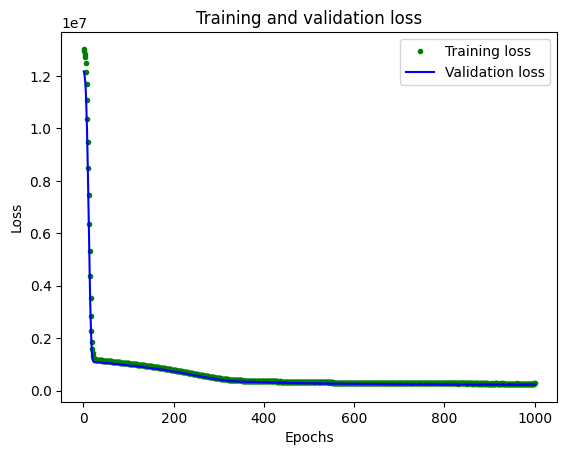

In [ ]:
# Disegna un grafico della perdita, che è la distanza tra i due
# i valori previsti ed effettivi durante l'addestramento e la validazione.
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **PROBLEMA DI UNDERFITTING**

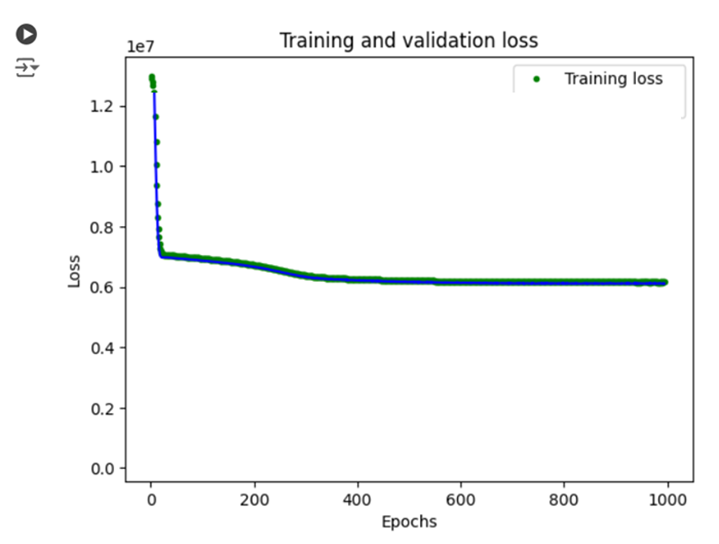

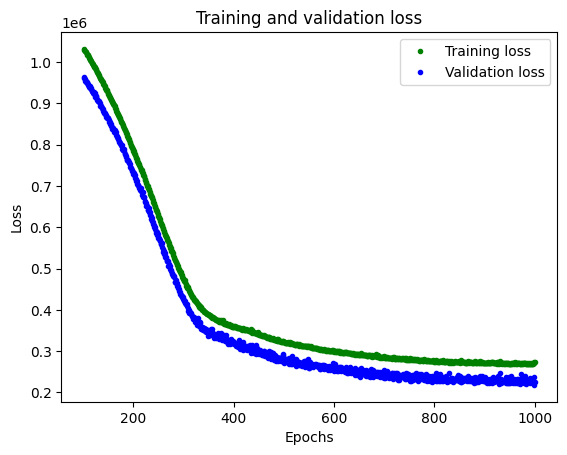

In [ ]:
# Escludere le prime epoche in modo che il grafico sia più facile da leggere
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **PROBLEMA DI OVERFITTING**

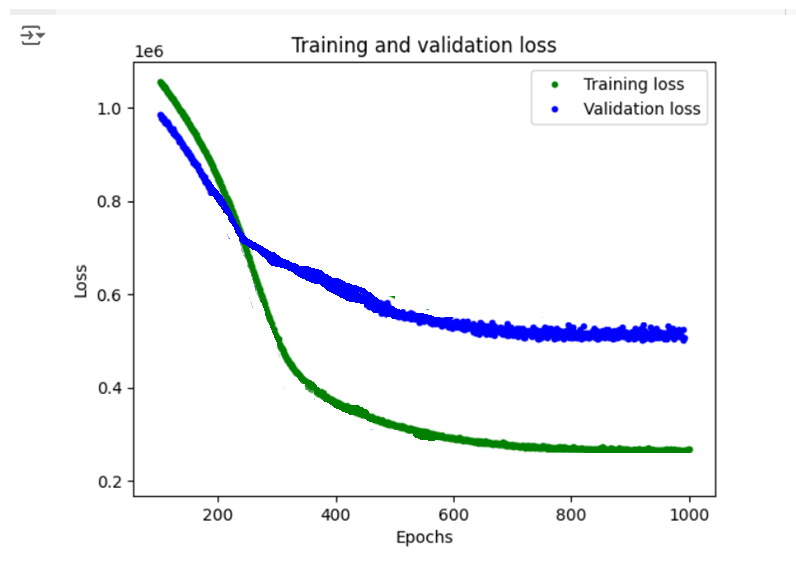

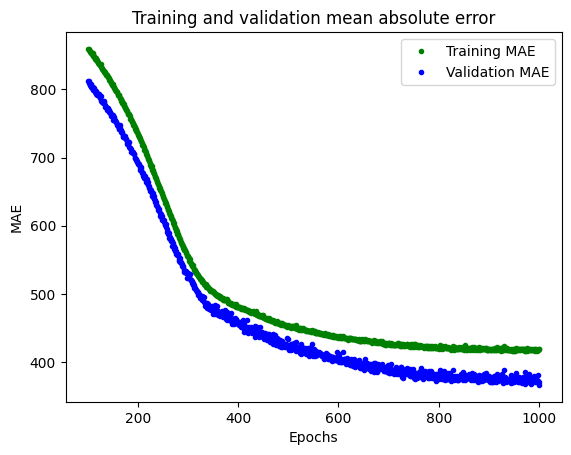

In [ ]:
# Disegna un grafico dell'errore medio assoluto, che è un altro modo di
# misurare la quantità di errore nella previsione.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 [==============================] - 0s 1ms/step


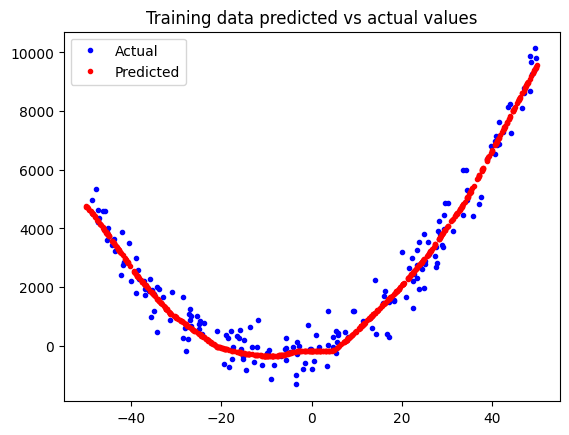

In [ ]:
# Utilizza il modello per fare previsioni dai nostri dati di apprendimento
predictions = model_1.predict(x_train)
# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()